Model Performance Metrics:
Accuracy: 0.6507

Classification Report:
                              precision    recall  f1-score   support

           Diabetic Friendly       0.33      0.20      0.25         5
                  Eggetarian       0.63      1.00      0.77        12
                 Gluten Free       0.00      0.00      0.00         1
 High Protein Non Vegetarian       1.00      0.33      0.50         3
     High Protein Vegetarian       0.32      0.80      0.46        10
No Onion No Garlic (Sattvic)       0.00      0.00      0.00         1
              Non Vegeterian       0.86      0.86      0.86         7
             Sugar Free Diet       0.00      0.00      0.00         0
                       Vegan       1.00      0.33      0.50         3
                  Vegetarian       0.86      0.65      0.74        96
                         nan       0.24      0.50      0.32         8

                    accuracy                           0.65       146
                   m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

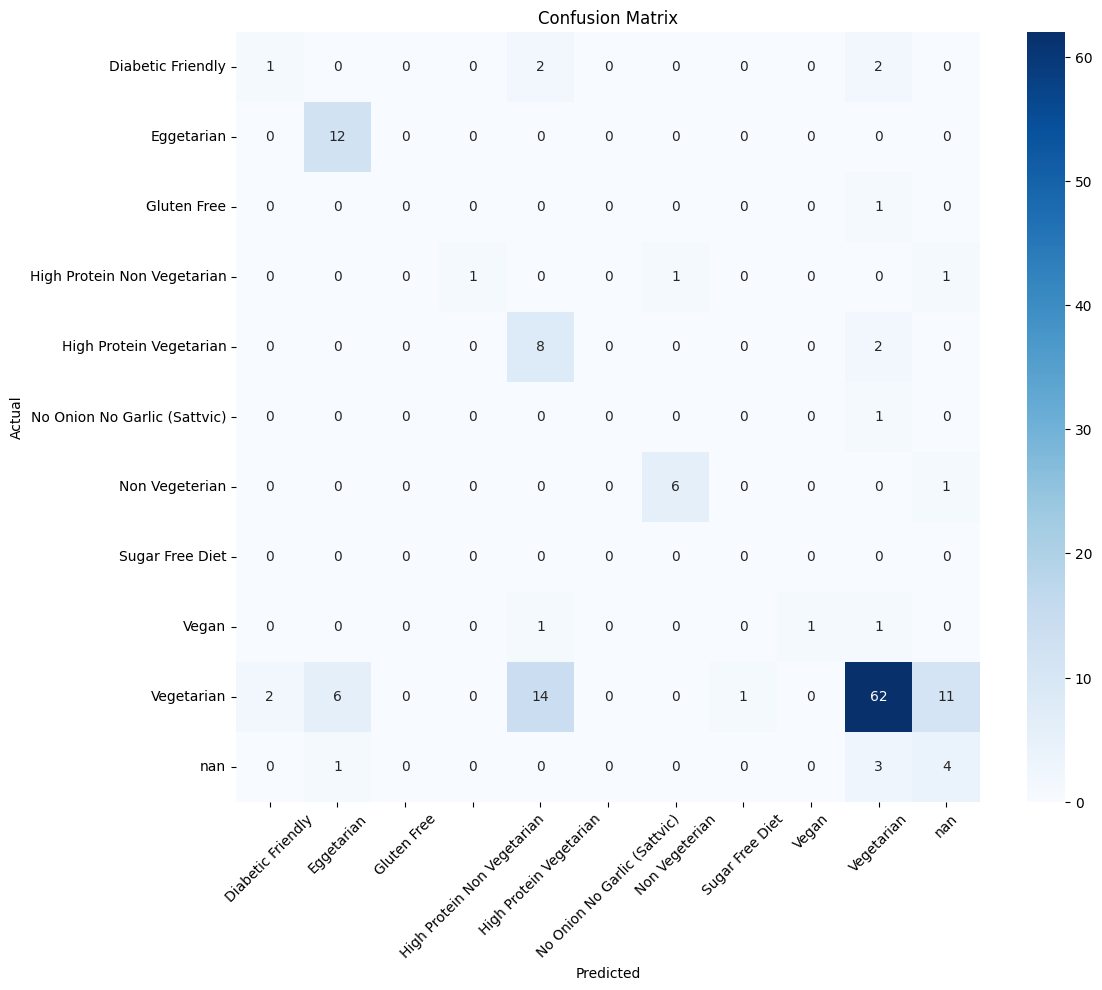


Sample Recipe Prediction: Vegetarian


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Food_Recipe.csv')  # Update with your actual filename

# Preprocessing
# Handle missing values
df['diet'] = df['diet'].fillna('nan')  # Convert NaN to 'nan' category
df = df.dropna(subset=['instructions'])  # Remove rows with missing recipes

# Split data
X = df['instructions']
y = df['diet']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Create pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        stop_words='english',
        ngram_range=(1, 2),
        max_features=15000
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        C=1.5
    ))
])

# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)

# Print performance metrics
print("Model Performance Metrics:")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=pipeline.classes_,
            yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Example prediction
sample_recipe = ["Mix chickpeas, olive oil, lemon juice, and garlic to make hummus."]
pred = pipeline.predict(sample_recipe)
print(f"\nSample Recipe Prediction: {pred[0]}")

In [12]:
sample_recipe = [ "this is a recipe use jackfruit which almost taste like a chicken"]
pred = pipeline.predict(sample_recipe)
print(f"\nSample Recipe Prediction: {pred[0]}")


Sample Recipe Prediction: Non Vegeterian


In [13]:
# Add to the end of your existing code
from joblib import dump

# Save the entire pipeline
dump(pipeline, 'tfidf_recipe_classifier.joblib')

# Save label classes (optional but useful)
import numpy as np
np.save('class_names.npy', pipeline.classes_)

print("Model saved as tfidf_recipe_classifier.joblib")

Model saved as tfidf_recipe_classifier.joblib


In [15]:
from joblib import load
import numpy as np

class TFIDFRecipeClassifier:
    def __init__(self, model_path):
        self.pipeline = load(model_path)
        self.classes = self.pipeline.classes_  # Get classes directly from pipeline

    def predict(self, recipe_text):
        # Ensure input is in correct format
        if isinstance(recipe_text, str):
            recipe_text = [recipe_text]
        return self.pipeline.predict(recipe_text)[0]

    def predict_proba(self, recipe_text):
        """Optional: Get probability scores"""
        if isinstance(recipe_text, str):
            recipe_text = [recipe_text]
        return self.pipeline.predict_proba(recipe_text)[0]

if __name__ == "__main__":
    # Initialize classifier
    classifier = TFIDFRecipeClassifier('tfidf_recipe_classifier.joblib')

    # Sample prediction
    sample_recipe = """
    Mix rolled oats, almond milk, chia seeds, and honey.
    Let sit overnight in the refrigerator.
    """
    prediction = classifier.predict(sample_recipe)
    print(f"Predicted Dietary Category: {prediction}")

Predicted Dietary Category: Vegetarian
